## PROSTATE CANCER CLASSFICATION

This prostate cancer dataset contains 100 samples with 8 numerical features and a binary target label (diagnosis_result). Each sample represents a tumor and includes measurements like radius, texture, area, smoothness, etc., extracted from medical images. The goal is to classify tumors as malignant (M) or benign (B) using these features. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Import datset and clean the data

In [2]:
data = pd.read_csv(r"D:\Datascience\My_Projects\Prostate_cancer_classification\Prostate_Cancer.csv")
data

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
data.isnull().any()

id                   False
diagnosis_result     False
radius               False
texture              False
perimeter            False
area                 False
smoothness           False
compactness          False
symmetry             False
fractal_dimension    False
dtype: bool

In [5]:
data.duplicated().any()

False

In [6]:
data.round(2)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.14,0.28,0.24,0.08
1,2,B,9,13,133,1326,0.14,0.08,0.18,0.06
2,3,M,21,27,130,1203,0.12,0.16,0.21,0.06
3,4,M,14,16,78,386,0.07,0.28,0.26,0.10
4,5,M,9,19,135,1297,0.14,0.13,0.18,0.06
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.09,0.13,0.21,0.06
96,97,B,22,14,78,451,0.10,0.07,0.19,0.07
97,98,B,19,27,62,295,0.10,0.05,0.14,0.07
98,99,B,21,24,74,413,0.09,0.08,0.16,0.07


Correlation

In [7]:
data.corr()

C:\Users\aziya\AppData\Local\Temp\ipykernel_7956\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,1.000000,0.047276,0.052263,-0.215953,-0.174354,-0.258328,-0.277554,-0.222334,-0.164946
radius,0.047276,1.000000,0.100245,-0.238216,-0.250934,-0.127121,-0.191490,-0.039707,-0.029120
texture,0.052263,0.100245,1.000000,-0.113453,-0.113725,0.102321,0.032446,0.077912,0.139157
perimeter,-0.215953,-0.238216,-0.113453,1.000000,0.976648,0.269442,0.527542,0.195539,-0.195434
area,-0.174354,-0.250934,-0.113725,0.976648,1.000000,0.208438,0.424950,0.110435,-0.274344
smoothness,-0.258328,-0.127121,0.102321,0.269442,0.208438,1.000000,0.465723,0.424203,0.369580
compactness,-0.277554,-0.191490,0.032446,0.527542,0.424950,0.465723,1.000000,0.681123,0.647953
symmetry,-0.222334,-0.039707,0.077912,0.195539,0.110435,0.424203,0.681123,1.000000,0.568608
fractal_dimension,-0.164946,-0.029120,0.139157,-0.195434,-0.274344,0.369580,0.647953,0.568608,1.000000


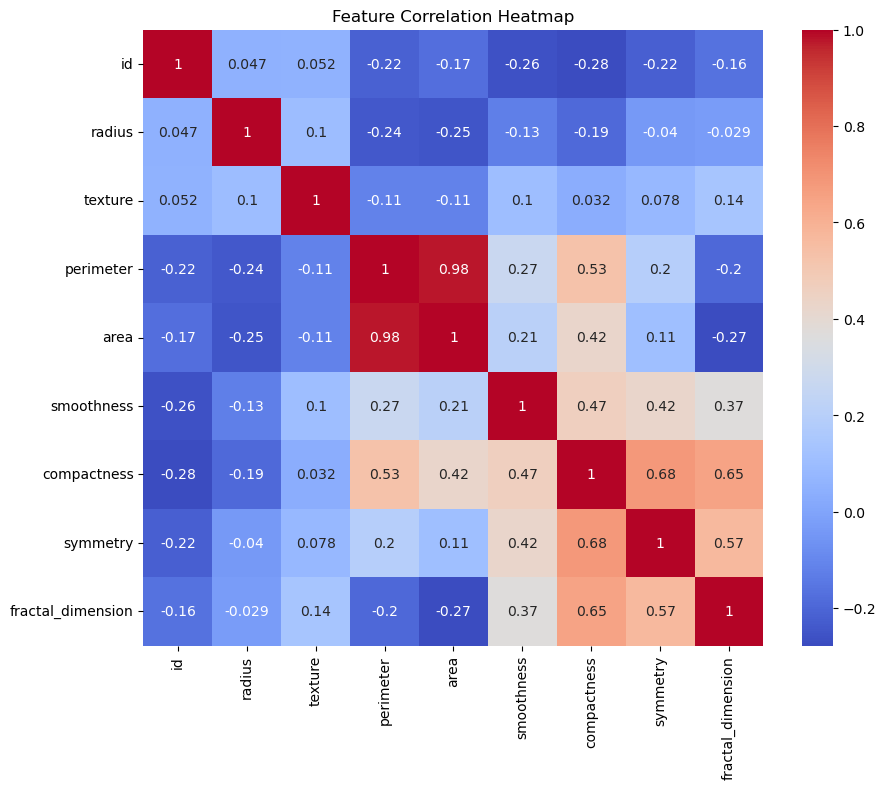

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=["diagnosis_result"]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


Multicollinarity in area and perimeter. Remove perimeter

In [9]:
data.pop('perimeter')

0     151
1     133
2     130
3      78
4     135
     ... 
95    132
96     78
97     62
98     74
99     94
Name: perimeter, Length: 100, dtype: int64

Finding outliers and removing it

In [10]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Outlier condition
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# To get outlier rows:
outlier_rows = data[outliers.any(axis=1)]


C:\Users\aziya\AppData\Local\Temp\ipykernel_7956\3879681077.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\aziya\AppData\Local\Temp\ipykernel_7956\3879681077.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
C:\Users\aziya\AppData\Local\Temp\ipykernel_7956\3879681077.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))


In [11]:
outlier_rows

,id,diagnosis_result,radius,texture,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,954,0.143,0.278,0.242,0.079
1,2,B,9,13,1326,0.143,0.079,0.181,0.057
3,4,M,14,16,386,0.070,0.284,0.260,0.097
4,5,M,9,19,1297,0.141,0.133,0.181,0.059
25,26,M,19,27,913,0.119,0.228,0.304,0.074
60,61,B,15,18,312,0.113,0.081,0.274,0.070
71,72,B,9,26,244,0.098,0.153,0.190,0.090
78,79,M,16,18,1245,0.129,0.345,0.291,0.081
82,83,M,10,15,1878,0.106,0.267,0.183,0.068


In [12]:

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



data_cleaned = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

C:\Users\aziya\AppData\Local\Temp\ipykernel_7956\2580910902.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_cleaned = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]


In [13]:
print("Original shape:", data.shape)
print("Cleaned shape:", data_cleaned.shape)


Original shape: (100, 9)
Cleaned shape: (91, 9)


Splitting dataset into test and train data

In [14]:
x = data.drop(data.columns[1], axis=1)  # Drop column at index 1
y = data.iloc[:, 1]   


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)        


# LOGISTIC REGRESSION 

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = "lbfgs",max_iter=1000)
model.fit(x_train,y_train)
y_pred1 = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [19]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Train Accuracy:%2f"%(accuracy_score(y_train,y_pred_train)*100))
print("Test Accuracy:%2f"% (accuracy_score(y_test,y_pred1)*100))


Train Accuracy:87.500000
Test Accuracy:90.000000


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
train_precision1 = precision_score(y_train, y_pred_train, average='weighted')
train_recall1 = recall_score(y_train, y_pred_train, average='weighted')
print("Train Precision: %.2f%%" % (train_precision1 * 100))
print("Train Recall: %.2f%%" % (train_recall1 * 100))

test_precision1 = precision_score(y_test, y_pred1, average='weighted')
test_recall1 = recall_score(y_test, y_pred1, average='weighted') 
print("Test Precision: %.2f%%" % (test_precision1 * 100))
print("Test Recall: %.2f%%" % (test_recall1 * 100))

Train Precision: 87.50%
Train Recall: 87.50%
Test Precision: 91.11%
Test Recall: 90.00%


In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

cm = confusion_matrix(y_test, y_pred1)



Plot confusion matrix

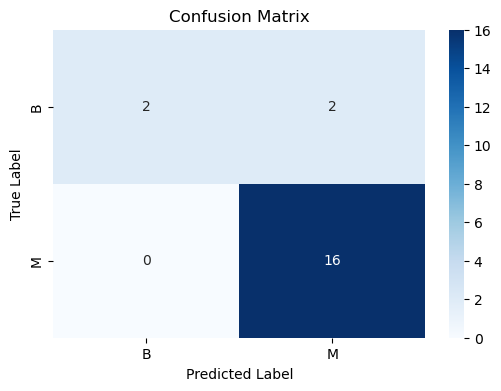

In [22]:

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# K-NN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5,metric = "minkowski", p =2)

In [24]:
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
y_pred2 = model2.predict(x_test)
y_pred_train2 = model2.predict(x_train)


In [26]:
print("Train Accuracy:%2f"%(accuracy_score(y_train,y_pred_train2)*100))
print("Test Accuracy:%2f"% (accuracy_score(y_test,y_pred2)*100))


Train Accuracy:85.000000
Test Accuracy:80.000000


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
train_precision2 = precision_score(y_train, y_pred_train2, average='weighted')
train_recall2 = recall_score(y_train, y_pred_train2, average='weighted')
print("Train Precision: %.2f%%" % (train_precision2 * 100))
print("Train Recall: %.2f%%" % (train_recall2 * 100))

test_precision2 = precision_score(y_test, y_pred2, average='weighted')
test_recall2 = recall_score(y_test, y_pred2, average='weighted') 
print("Test Precision: %.2f%%" % (test_precision2 * 100))
print("Test Recall: %.2f%%" % (test_recall2 * 100))

Train Precision: 84.97%
Train Recall: 85.00%
Test Precision: 76.67%
Test Recall: 80.00%


# SVM

In [28]:
from sklearn.svm import SVC
model3 = SVC(kernel = "linear",random_state=0)
model3.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [29]:
y_pred3 = model3.predict(x_test)
y_pred_train3 = model3.predict(x_train)

In [30]:
print("Train Accuracy:%2f"%(accuracy_score(y_train,y_pred_train3)*100))
print("Test Accuracy:%2f"% (accuracy_score(y_test,y_pred3)*100))

Train Accuracy:87.500000
Test Accuracy:85.000000


In [31]:
train_precision3 = precision_score(y_train, y_pred_train3, average='weighted')
train_recall3 = recall_score(y_train, y_pred_train3, average='weighted')
print("Train Precision: %.2f%%" % (train_precision3 * 100))
print("Train Recall: %.2f%%" % (train_recall3 * 100))

test_precision3 = precision_score(y_test, y_pred3, average='weighted')
test_recall3 = recall_score(y_test, y_pred3, average='weighted') 
print("Test Precision: %.2f%%" % (test_precision3 * 100))
print("Test Recall: %.2f%%" % (test_recall3 * 100))

Train Precision: 87.50%
Train Recall: 87.50%
Test Precision: 83.92%
Test Recall: 85.00%


# NAIVE BAYES

In [32]:
from sklearn.naive_bayes import BernoulliNB
model4 = BernoulliNB()
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
y_pred_train4= model4.predict(x_train)

In [33]:
print("Train Accuracy:%2f"%(accuracy_score(y_train,y_pred_train4)*100))
print("Test Accuracy:%2f"% (accuracy_score(y_test,y_pred4)*100))

Train Accuracy:86.250000
Test Accuracy:75.000000


In [34]:
train_precision4= precision_score(y_train, y_pred_train4, average='weighted')
train_recall4 = recall_score(y_train, y_pred_train4, average='weighted')
print("Train Precision: %.2f%%" % (train_precision4 * 100))
print("Train Recall: %.2f%%" % (train_recall4 * 100))

test_precision4 = precision_score(y_test, y_pred4, average='weighted')
test_recall4 = recall_score(y_test, y_pred4, average='weighted') 
print("Test Precision: %.2f%%" % (test_precision4 * 100))
print("Test Recall: %.2f%%" % (test_recall4 * 100))

Train Precision: 86.22%
Train Recall: 86.25%
Test Precision: 77.33%
Test Recall: 75.00%


# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model5 = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=2, min_samples_split=15, min_samples_leaf=10, ccp_alpha=0.03, class_weight="balanced")
model5.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.03, class_weight='balanced',
                       criterion='entropy', max_depth=2, min_samples_leaf=10,
                       min_samples_split=15, random_state=42)

In [71]:
y_pred5 = model5.predict(x_test)
y_pred_train5 = model5.predict(x_train)

In [72]:
print("Train Accuracy:%2f"%(accuracy_score(y_train,y_pred_train5)*100))
print("Test Accuracy:%2f"% (accuracy_score(y_test,y_pred5)*100))

Train Accuracy:90.000000
Test Accuracy:85.000000


In [44]:
train_precision5 = precision_score(y_train, y_pred_train5, average='weighted')
train_recall5 = recall_score(y_train, y_pred_train5, average='weighted')
print("Train Precision: %.2f%%" % (train_precision5 * 100))
print("Train Recall: %.2f%%" % (train_recall5 * 100))

test_precision5 = precision_score(y_test, y_pred5, average='weighted')
test_recall5 = recall_score(y_test, y_pred5, average='weighted') 
print("Test Precision: %.2f%%" % (test_precision5 * 100))
print("Test Recall: %.2f%%" % (test_recall5 * 100))

Train Precision: 98.78%
Train Recall: 98.75%
Test Precision: 80.00%
Test Recall: 80.00%


# RANDOM FOREST

In [80]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(
    n_estimators=100,  # Increased from 50
    criterion='entropy',
    random_state=42,
    max_depth=2,  # Reduced from 3
    min_samples_split=20,  # Increased from 10
    min_samples_leaf=10,  # Increased from 5
    max_features='sqrt'  # Added to limit features per split
)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
y_pred_train6 = model6.predict(x_train)    

In [81]:
print("Train Accuracy:%2f"%(accuracy_score(y_train,y_pred_train6)*100))
print("Test Accuracy:%2f"% (accuracy_score(y_test,y_pred6)*100))

Train Accuracy:91.250000
Test Accuracy:90.000000


In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
train_precision6 = precision_score(y_train, y_pred_train6, average='weighted')
train_recall6 = recall_score(y_train, y_pred_train6, average='weighted')
print("Train Precision: %.2f%%" % (train_precision6 * 100))
print("Train Recall: %.2f%%" % (train_recall6 * 100))

test_precision6 = precision_score(y_test, y_pred6, average='weighted')
test_recall6 = recall_score(y_test, y_pred6, average='weighted') 
print("Test Precision: %.2f%%" % (test_precision6 * 100))
print("Test Recall: %.2f%%" % (test_recall6 * 100))

Train Precision: 91.77%
Train Recall: 91.25%
Test Precision: 91.11%
Test Recall: 90.00%


###   Conclusion

This prostate cancer classification project effectively demonstrated the capability of machine learning models to distinguish between malignant and benign tumors using key clinical features like radius, texture, and area. Among the tested algorithms, Random Forest and Logistic Regression delivered the highest accuracy (90%), highlighting their reliability for diagnostic applications. The strong performance suggests that these numerical features contain meaningful patterns for tumor classification, though further validation on larger datasets would improve robustness. Ultimately, this work supports the potential of ML-assisted diagnostics to enhance early detection and decision-making in prostate cancer care.


